# **Graded Challenge 1**

<hr>

*by* **Annisa Ditasila**
*batch 017*

<hr>

## Background
Covid 19 adalah virus yang disebarkan oleh hewan kepada manusia melalui udara. Seseorang bisa terinfeksi virus dari orang lain yang sudah terkena virus terbeut, atau dengan menyentuh sesuatu yang yang sudah terkontaminasi oleh virus. Ditemukan pertama kali di tahun 2019 dan berkembang pesat di dunia hingga sekarang. 

<hr>

## Problem Statement
Dataset yang digunakan dalam project ini adalah dataset kasus Covid 19. Dataset ini berisi 34396 baris dengan 13 kolom yang diantaranya adalah provinsi state, country region, date, latitude, longtitude, location geometry, confirmed, deaths, recovered, active, fips, admin2, combined key. Dataset diambil dari [link berikut.](https://console.cloud.google.com/marketplace/details/johnshopkins/covid19_jhu_global_cases)


<hr>

## Objectives
Tujuan yang ingin dicapai pada project ini adalah:
1. Mencari tahu di tahun berapa Covid 19 kasus terkonfirmasi
2. Melakukan uji hipotesis ratio angka kematian, kesembuhan, dan aktif di US


<hr>

## Description

In [1]:
import pandas as pd
df = pd.read_excel('Description datasset.xlsx')
df

,Keys,Description
0,provinsi state,Lokasi berdasarkan provinsi
1,country region,Lokasi berdasarkan negara
2,date,Data kasus yang terjadi saat data di input
3,latitude,Tempat lokasi yang menunjukan garis yang membe...
4,longtitude,Tempat lokasi yang menunjukan garis yang membe...
5,location geometry,Lokasi tempat berdasarkan latitude dan longtitude
6,confirmed,Kasus yang terkonfirmasi
7,deaths,kasus kematian
8,recovered,kasus sembuh
9,active,kasus yang masih aktif


<hr>

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

## Data Loading

In [3]:
import pandas as pd
cases_covid_19 = pd.read_csv('datacovid_summary.csv')
cases_covid_19

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Georgia,US,2020-05-14,33.555145,-83.845471,POINT(-83.8454714 33.55514538),263,8,0.0,255.0,13217.0,Newton,"Newton, Georgia, US"
1,Mississippi,US,2020-05-14,32.400211,-89.118433,POINT(-89.11843336 32.40021118),161,2,0.0,159.0,28101.0,Newton,"Newton, Mississippi, US"
2,Minnesota,US,2020-05-14,44.352911,-94.247104,POINT(-94.24710352 44.35291112),23,2,0.0,21.0,27103.0,Nicollet,"Nicollet, Minnesota, US"
3,Indiana,US,2020-05-14,41.396725,-85.419667,POINT(-85.41966713 41.39672484),144,17,0.0,127.0,18113.0,Noble,"Noble, Indiana, US"
4,Ohio,US,2020-05-14,39.768189,-81.459372,POINT(-81.45937183 39.76818851),5,0,0.0,5.0,39121.0,Noble,"Noble, Ohio, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34391,Tennessee,US,2020-12-09,36.289691,-82.125890,POINT(-82.12588974 36.28969086),3262,70,0.0,3192.0,47019.0,Carter,"Carter, Tennessee, US"
34392,Tennessee,US,2020-12-09,36.261362,-87.089036,POINT(-87.08903581 36.26136216),1879,18,0.0,1861.0,47021.0,Cheatham,"Cheatham, Tennessee, US"
34393,Tennessee,US,2020-12-09,35.425275,-88.609584,POINT(-88.6095842 35.42527478),1142,25,0.0,1117.0,47023.0,Chester,"Chester, Tennessee, US"
34394,Tennessee,US,2020-12-09,36.483191,-83.659473,POINT(-83.65947309 36.48319149),1093,11,0.0,1082.0,47025.0,Claiborne,"Claiborne, Tennessee, US"


In [4]:
cases_covid_19.sort_values(by='confirmed').tail(10)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
25560,NaN,Turkey,2022-10-13,38.963700,35.243300,POINT(35.2433 38.9637),16919638,101203,NaN,NaN,NaN,NaN,Turkey
28064,NaN,"Korea, South",2022-08-04,35.907757,127.766922,POINT(127.766922 35.907757),20273011,25191,NaN,NaN,NaN,NaN,"Korea, South"
20042,England,United Kingdom,2022-12-01,52.355500,-1.174300,POINT(-1.1743 52.3555),20291473,179868,NaN,NaN,NaN,NaN,"England, United Kingdom"
8402,NaN,France,2022-02-24,46.227600,2.213700,POINT(2.2137 46.2276),21933357,134772,NaN,NaN,NaN,NaN,France
25461,NaN,"Korea, South",2022-10-13,35.907757,127.766922,POINT(127.766922 35.907757),25076239,28783,NaN,NaN,NaN,NaN,"Korea, South"
590,NaN,"Korea, South",2022-10-28,35.907757,127.766922,POINT(127.766922 35.907757),25504288,29131,NaN,NaN,NaN,NaN,"Korea, South"
17453,NaN,France,2022-05-08,46.227600,2.213700,POINT(2.2137 46.2276),28176211,143524,NaN,NaN,NaN,NaN,France
32087,NaN,France,2022-09-12,46.227600,2.213700,POINT(2.2137 46.2276),33754160,151047,NaN,NaN,NaN,NaN,France
25409,NaN,France,2022-10-13,46.227600,2.213700,POINT(2.2137 46.2276),35119728,152208,NaN,NaN,NaN,NaN,France
545,NaN,France,2022-10-28,46.227600,2.213700,POINT(2.2137 46.2276),35782940,153295,NaN,NaN,NaN,NaN,France


<hr>

## Data Characteristics

In [5]:
cases_covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34396 entries, 0 to 34395
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  32753 non-null  object 
 1   country_region  34396 non-null  object 
 2   date            34396 non-null  object 
 3   latitude        33650 non-null  float64
 4   longitude       33650 non-null  float64
 5   location_geom   33650 non-null  object 
 6   confirmed       34396 non-null  int64  
 7   deaths          34396 non-null  int64  
 8   recovered       11117 non-null  float64
 9   active          11109 non-null  float64
 10  fips            28090 non-null  float64
 11  admin2          28122 non-null  object 
 12  combined_key    34396 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 3.4+ MB


Dataset ini terdiri dari :
- 5 kolom dengan tipe data float
- 2 kolom dengan tipe data integer
- 6 kolom dengan data object

<hr>

## Data Cleaning


In [6]:
remove = ['latitude', 'longitude', 'admin2', 'combined_key']
cases_covid_19.drop(remove, inplace =True, axis =1)
cases_covid_19

,province_state,country_region,date,location_geom,confirmed,deaths,recovered,active,fips
0,Georgia,US,2020-05-14,POINT(-83.8454714 33.55514538),263,8,0.0,255.0,13217.0
1,Mississippi,US,2020-05-14,POINT(-89.11843336 32.40021118),161,2,0.0,159.0,28101.0
2,Minnesota,US,2020-05-14,POINT(-94.24710352 44.35291112),23,2,0.0,21.0,27103.0
3,Indiana,US,2020-05-14,POINT(-85.41966713 41.39672484),144,17,0.0,127.0,18113.0
4,Ohio,US,2020-05-14,POINT(-81.45937183 39.76818851),5,0,0.0,5.0,39121.0
...,...,...,...,...,...,...,...,...,...
34391,Tennessee,US,2020-12-09,POINT(-82.12588974 36.28969086),3262,70,0.0,3192.0,47019.0
34392,Tennessee,US,2020-12-09,POINT(-87.08903581 36.26136216),1879,18,0.0,1861.0,47021.0
34393,Tennessee,US,2020-12-09,POINT(-88.6095842 35.42527478),1142,25,0.0,1117.0,47023.0
34394,Tennessee,US,2020-12-09,POINT(-83.65947309 36.48319149),1093,11,0.0,1082.0,47025.0


Pada data cleaning ini dihapus kolom Latitude, Longitude, Admin2, dan Combined_key karena kolom tersebut tidak diperlukan dalam analisis data

In [7]:
cases_covid_19 = cases_covid_19.rename(columns={'province_state' : 'Provinsi', 'country_region' : 'Negara', 'date' : 'Tanggal', 'location_geom' : 'Lokasi' ,'confirmed' : 'Konfirmasi', 'deaths' : 'Meninggal', 'recovered' : 'Sembuh', 'active' : 'Aktif', 'fips' : 'Fips'})
cases_covid_19.head(10)

,Provinsi,Negara,Tanggal,Lokasi,Konfirmasi,Meninggal,Sembuh,Aktif,Fips
0,Georgia,US,2020-05-14,POINT(-83.8454714 33.55514538),263,8,0.0,255.0,13217.0
1,Mississippi,US,2020-05-14,POINT(-89.11843336 32.40021118),161,2,0.0,159.0,28101.0
2,Minnesota,US,2020-05-14,POINT(-94.24710352 44.35291112),23,2,0.0,21.0,27103.0
3,Indiana,US,2020-05-14,POINT(-85.41966713 41.39672484),144,17,0.0,127.0,18113.0
4,Ohio,US,2020-05-14,POINT(-81.45937183 39.76818851),5,0,0.0,5.0,39121.0
5,Massachusetts,US,2020-05-14,POINT(-71.20530408 42.16073095),7258,696,0.0,6562.0,25021.0
6,Minnesota,US,2020-05-14,POINT(-96.45620947 47.32628443),11,0,0.0,11.0,27107.0
7,Virginia,US,2020-05-14,POINT(-82.62750411 36.93357076),2,0,0.0,2.0,51720.0
8,Oklahoma,US,2020-05-14,POINT(-95.61902331 36.79843529),23,0,0.0,23.0,40105.0
9,Mississippi,US,2020-05-14,POINT(-88.56949061 33.11009499),118,2,0.0,116.0,28103.0


Untuk menganilisis lebih lanjut, maka **missing values** di kolom konfirmasi, meninggal, sembuh dan aktif akan diubah menjadi 0

In [8]:
cases_covid_19.update(cases_covid_19[['Meninggal','Sembuh','Aktif']].fillna(0))

In [9]:
cases_covid_19.isnull().sum()

Provinsi      1643
Negara           0
Tanggal          0
Lokasi         746
Konfirmasi       0
Meninggal        0
Sembuh           0
Aktif            0
Fips          6306
dtype: int64

Dari sini juga dapat diketahui bahwa **tidak ada missing value** pada dataset.

In [10]:
confirmed_cases_covid_19 = cases_covid_19.groupby('Negara').agg({'Konfirmasi' : sum})


In [11]:
confirmed_cases_covid_19.reset_index().sort_values('Konfirmasi').tail(10)

,Negara,Konfirmasi
86,Italy,68521358
94,"Korea, South",82134758
147,Russia,82451086
189,United Kingdom,86779881
184,Turkey,94016233
67,Germany,95683914
63,France,173097141
24,Brazil,173613749
80,India,236866389
185,US,441386462


Diketahui bahwa **kasus terkonfinfirmasi** covid 10 negara teratas diduduki oleh *US, India, Brazil, France, Germany, Turkey, United Kingdom, Russia, South Korean dan Italy.*

In [12]:
death_cases_covid_19 = cases_covid_19.groupby('Negara').agg({'Meninggal' : sum})

In [13]:
death_cases_covid_19.reset_index().sort_values('Meninggal').tail(10)

,Negara,Meninggal
81,Indonesia,1004997
63,France,1012987
165,South Africa,1074905
189,United Kingdom,1082986
141,Peru,1663140
147,Russia,1766988
117,Mexico,1956229
80,India,3012230
24,Brazil,3828425
185,US,5918781


Dari dataset tersebut diketahui bahwa jumlah **kematian** diurutkan mulai dari yang terbesar berada di negara *US, Brazil, India, Mexico, Russia, Peru, United Kingdom, South Africa, France, dan Indonesia.*

In [14]:
recover_cases_covid_19 = cases_covid_19.groupby('Negara').agg({'Sembuh' : sum})

In [15]:
recover_cases_covid_19.reset_index().sort_values('Sembuh').tail(10)

,Negara,Sembuh
67,Germany,5187132.0
165,South Africa,6001821.0
38,Colombia,6934000.0
86,Italy,6980096.0
81,Indonesia,7094818.0
147,Russia,7698551.0
117,Mexico,8129708.0
184,Turkey,8785596.0
24,Brazil,22696235.0
80,India,41518685.0


Dari dataset tersebut diketahui bahwa jumlah kesembuhan diurutkan mulai dari yang terbesar berada dari negara *India, Brazil, Turkey, Mexico, Russia, Indonesia, Italy, Colombia, South Africa dan Germany.*

<hr>

## Data Exploration

Pada bagian Data Exploration ini akan dilakukan analisa untuk mengetahui di tahun berapa angka paling banyak meninggal, sembuh dan aktif akibat covid 19

In [16]:
year_cases_covid_19 = cases_covid_19.set_index('Tanggal').groupby('Tanggal')[['Konfirmasi','Meninggal','Aktif']].sum()
year_cases_covid_19

,Konfirmasi,Meninggal,Aktif
Tanggal,,,
2020-04-25,700472,44572,447148.0
2020-05-14,993638,96032,308642.0
2020-06-13,2754951,106271,1705930.0
2020-06-19,2935063,170095,1324707.0
2020-10-02,12032649,344752,4822931.0
2020-10-18,12759167,346485,4599183.0
2020-12-09,19270635,424890,7658048.0
2021-02-25,33159623,748250,12200557.0
2021-03-05,46079542,970346,17352673.0


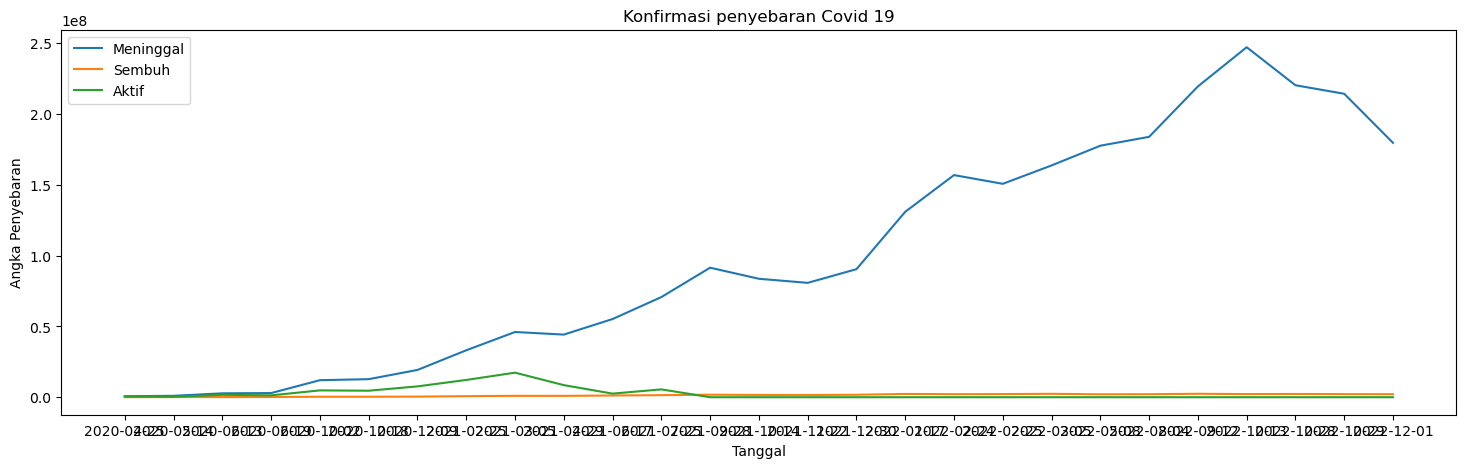

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(year_cases_covid_19, label=['Meninggal','Sembuh', 'Aktif'])
plt.title('Konfirmasi penyebaran Covid 19')
plt.xlabel('Tanggal')
plt.ylabel('Angka Penyebaran')
plt.legend()
plt.show()

Dari grafik diatas dapat dilihat bahwa **angka kematian paling banyak** berada diantara tahun *2021-2022*. **Angka aktif** dan **kesembuhan** di tahun *2022 belum terpenuhi* maka analisa berdasarkan angka yang terpenuhi adalah angka kematian dan angka kesembuhan dari tahun *2020-2021*. Angka tersebut naik dengan sangat signifikan.

**Pada bagian exploration ini akan dijelaskan kasus covid 19 di US.**

In [18]:
US_cases_covid_19 = cases_covid_19.copy()
prov_US_cases_covid_19 = US_cases_covid_19.loc[US_cases_covid_19['Negara'] == 'US']
new_prov_US_cases_covid_19 = prov_US_cases_covid_19.groupby('Provinsi')[['Meninggal', 'Sembuh', 'Aktif']].sum()
new_prov_US_cases_covid_19.drop(index='Recovered', inplace=True)
new_prov_US_cases_covid_19.sort_values('Aktif')

,Meninggal,Sembuh,Aktif
Provinsi,,,
American Samoa,67,0.0,0.0
Northern Mariana Islands,85,0.0,84.0
Diamond Princess,0,0.0,98.0
Guam,2716,0.0,136.0
Grand Princess,21,0.0,400.0
Virgin Islands,609,0.0,2744.0
Vermont,3151,0.0,10837.0
Maine,12588,0.0,36854.0
Alaska,6543,0.0,44118.0


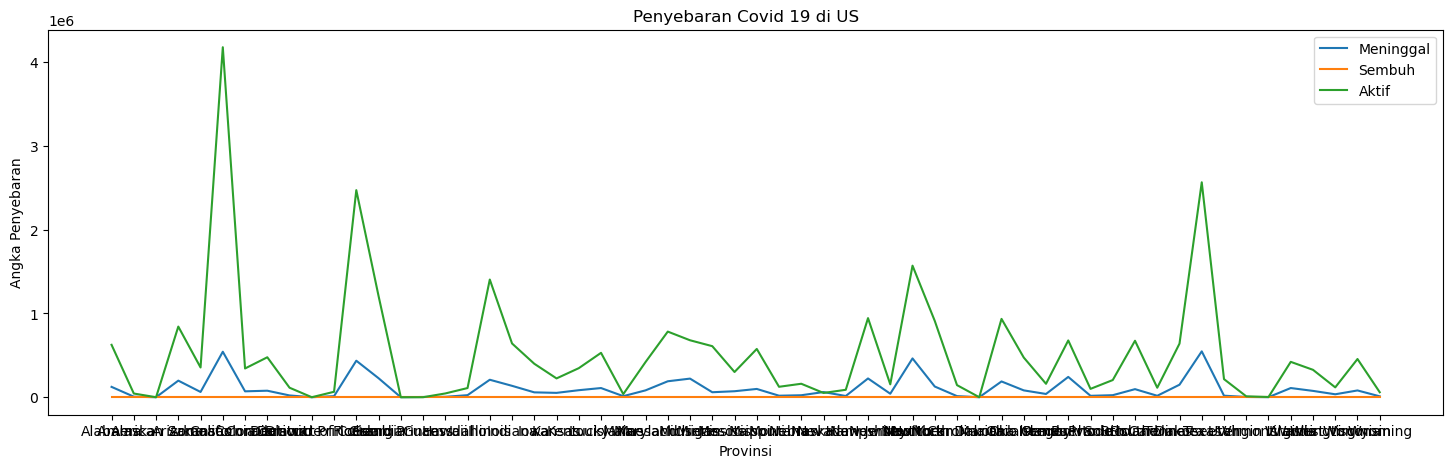

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(new_prov_US_cases_covid_19, label=['Meninggal', 'Sembuh', 'Aktif'])
plt.title('Penyebaran Covid 19 di US')
plt.xlabel('Provinsi')
plt.ylabel('Angka Penyebaran')
plt.legend()
plt.show()

Dari data diatas bisa disimpulkan bahwa angka **kasus aktif** tertinggi berada di *California* sebesar 4177048 kasus, kemudian disusul oleh *Texas* sebesar 2565026 kasus dan *Florida* sebesar 4177048 kasus.
Jika kita lihat dari **angka kematian**, angka tertinggi berada di provinsi *Texas* 547350 kasus, kemudian diikuti oleh *California* sebesar 542813 kasus dan *New York* sebesar 463005 kasus.

In [20]:
total_US_cases_covid_19 = US_cases_covid_19.loc[US_cases_covid_19['Negara'] == 'US']
new_total = total_US_cases_covid_19.groupby('Negara')[['Meninggal', 'Sembuh', 'Aktif']].sum().transpose()
new_total

Negara,US
Meninggal,5918781.0
Sembuh,246414.0
Aktif,29886465.0


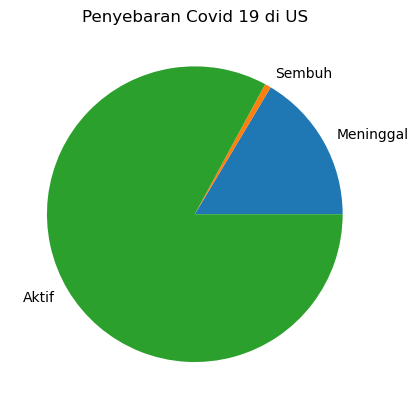

In [21]:
plt.pie(new_total["US"], labels = ['Meninggal', 'Sembuh', 'Aktif'])
plt.title('Penyebaran Covid 19 di US')
plt.show()

Dari pie plot diatas bisa disimpulkan bahwa **kasus aktif masih sangat tinggi** dari jumlah kasusnya. Sedangkan jumlah kematian lebih besar dari pada kesembuhannya,


<hr>

## Conclusion

Kesimpulan yang dapat ditarik dari data exploration ini adalah:

1. Mencari tahu di tahun berapa Covid 19 kasus terkonfirmasi
Pada dataset yang digunakan, **tahun 2021-2022 adalah tahun yang paling banyak kasus kematiannya**, analisis selanjutnya dalam kasus kesembuhan dan aktif Covid di tahun 2021-2022 belum bisa dianalisis dikarenakan data yang belum terpenuhi. Tetapi jika dilihat dari tahun sebelumnya kasus kesembuhan dan aktif covid yaitu dari tahun 2020-2021 naik secara signifikan.

2. Melakukan uji hipotesis ratio angka kematian, kesembuhan, dan aktif di US
Karena US adalah negara yang paling banyak kasus covid 19, maka hasil dari analisis bisa disimpulkan bahwa **ratio perbandingan antara kasus kematian dan kesembuhan dari 59 orang yang meninggal ada 2 orang yang bisa sembuh.**

Bisa disimpulkan bahwa covid 19 adalah kasus yang yang benar-benar harus ditangani dengan cepat dan tepat. karena dari dataset tersebut menunjukan kasus ini menyebar dengan cepat dan memakan korban jiwa dengan sangat besar.


Dari grafik diatas dapat dilihat bahwa **angka kematian paling banyak** berada diantara tahun *2021-2022*. **Angka aktif** dan **kesembuhan** di tahun *2022 belum terpenuhi* maka analisa berdasarkan angka yang terpenuhi adalah angka kematian dan angka kesembuhan dari tahun *2020-2021*. Angka tersebut naik dengan sangat signifikan.